# 카카오 코딩테스트 - 보석 쇼핑

# 문제

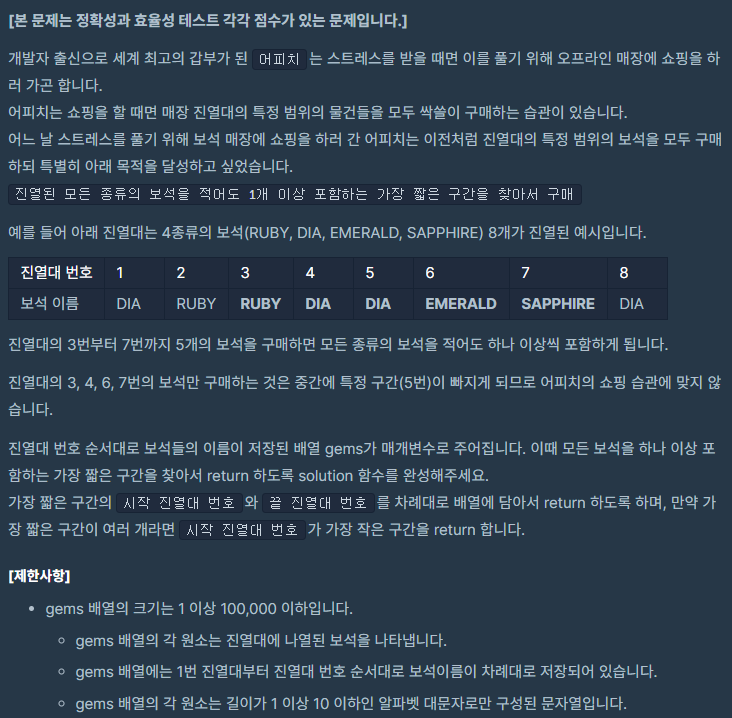

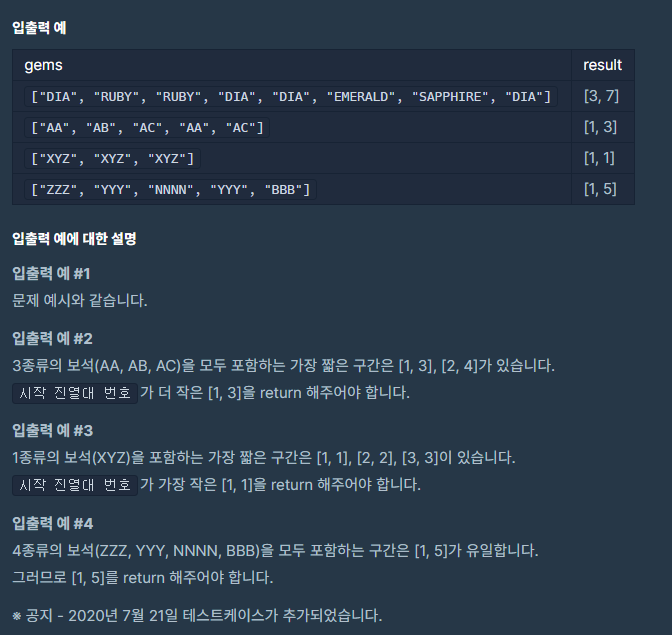

### 내 풀이
1차 풀이

1. 보석 리스트 앞에서 부터 보석을 넣을 deque 생성

2. 앞에서 부터 하나씩 넣으면서 만약 방금 넣은 보석이 2개 이상이면 체크

3. 체크: 맨 앞에부터 2개 이상인 보석 제거

4. 정답을 만족하는 [start, end]를 answers에 추가

5. 최종적으로 answers 안의 정답들 중 가장 짧은것 체크 > answer 반환

In [ ]:
def solution(gems):
    answers = []
    lst = deque([])
    num_all_jew = len(set(gems))
    num_dict = defaultdict(int)
    start = 1
    end = 0
    # 순서대로 넣기
    for r in range(len(gems)):
        lst.append(gems[r])
        num_dict[gems[r]] +=1
        end +=1
        # if 방금 넣은게 중복이면 앞에서 부터 2개 이상인거 제거
        if num_dict[gems[r]] >=2:
            for _ in range(len(lst)):
                #0번 위치가 두개 이상이면 제거 > 갯수 -1, 아니면 break
                if num_dict[lst[0]] >=2:
                    num_dict[lst[0]] -=1
                    lst.popleft()
                    # 앞에 뺏으니 시작 위치 +=1
                    start +=1
                else:
                    break
        
        # len(set) == num_all_jew면 스탑
        if len(set(lst)) == num_all_jew:
            answers.append([start,end])
            
    min_answer = 100000
    for a in answers:
        if min_answer > a[1]-a[0]:
            min_answer = a[1]-a[0]
            answer = a
            
    return answer

### 최종 풀이

위의 풀이에서 lst에 추가하고, 제거하는 시간을 줄이기 위해 lst 제거

하지만 결과는 동일 더 획기적인 풀이가 필요한듯

In [ ]:
from collections import defaultdict
from collections import deque
def solution(gems):
    answers = []
    lst = deque([])
    min_answer = 100000
    num_all_jew = len(set(gems))
    
    num_dict = defaultdict(int)
    
    start = 1
    end = 0
    # 순서대로 넣기
    for r in range(len(gems)):
        num_dict[gems[r]] +=1
        end +=1
        # if 방금 넣은게 중복이면 앞에서 부터 2개 이상인거 제거
        if num_dict[gems[r]] >=2:
            for _ in range(end-start+1):
                #0번 위치가 두개 이상이면 제거 > 갯수 -1, 아니면 break
                if num_dict[gems[start-1]] >=2:
                    num_dict[gems[start-1]] -=1
                    # 앞에 뺏으니 시작 위치 +=1
                    start +=1
                else:
                    break
        
        # len(set) == num_all_jew면 정답에 추가
        if len(set(gems[start-1:end])) == num_all_jew:
            if end-start < min_answer:
                min_answer = end-start
                answer = [start,end]        
    return answer

### 2 pointers

엄청 단순화 시켰는데 gems[lt-1:rt] 에서 늦려지는거 같다.

In [ ]:
def solution(gems):
    min_len = 1000000
    
    total_len_gems = len(set(gems))
    lt = 1
    rt = 1
    while True:
        if len(set(gems[lt-1:rt])) == total_len_gems:
            if min_len> rt-lt:
                min_len = rt-lt
                answer = [lt,rt]
            lt+=1
        else:
            rt+=1
        if rt == len(gems)+1:
            break
    return answer

### 가장 별로인 풀이

보석의 종류 갯수 ~ 전체 보석 리스트의 길이까지 다찾는 방법

풀이 방법은 맞지만 정확성 테스트 마저 시간초과가 떴다

In [ ]:
def solution(gems):
    len_set_gems = len(set(gems))
    
    total_len = len(gems)
    
    for length in range(len_set_gems,total_len+1):
        for idx in range(total_len - len_set_gems+1):
            if len(set(gems[idx:idx+length])) == len_set_gems:
                return [idx+1,idx+length-1+1]
    
    
    return answer